# Imports

In [ ]:
%pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(name="Wine Quality")
df = wine_quality.data.original

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Outlier Detectetion

- First split out dataset into Red / White

In [ ]:
df_red = df[df.color == 'red'].iloc[:,:-2]  #exclude dependant variable 'quality
df_red.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [ ]:
df_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [ ]:
df_white = df[df.color == 'white'].iloc[:,:-2]   #exclude dependant variable 'quality
df_white.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [ ]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


Regarding the statistical description of each set, we can see that some characteristics of red wine and white wine are obviously different (e.g. SO2). It will make more sense to detect outliers repectively.

- We use Mahanalobis Distance to detect outliers

In [ ]:
def Mahanalobis_dist(data,mu=None,cov=None):
    if(hasattr(data, 'to_numpy')): ## Checking if the input is Numpy type or DataFrame type
        y = np.array(data.to_numpy(),ndmin=2) ## If not Numpy type: we assume this is a dataframe.
    else:
        y = data

    if(np.ndim(y)==1):
        if cov is None:sys.exit('Covariance should be provided')

        if mu is None:sys.exit('mu should be provided')

        if(np.size(y)==1):
            mana = (y-mu)**2/cov ## Univariate
        else:
            inv_covmat = np.linalg.inv(cov)
            y_mu = np.array(y - mu,ndmin=2) ## array 1xK
            mana = np.matmul(y_mu,np.matmul(inv_covmat,y_mu.transpose()))
    else:
        if(np.size(y,0)<np.size(y,1)):## Ensure that the array is of size NxK
            y = y.transpose()

        if cov is None:
            cov = np.cov(y.transpose())

        if mu is None:
            mu = np.mean(y,axis=0)

        N = np.size(y,0)
        y_mu = y - np.tile(mu,[N,1]) ## to perform matrix multiplication
        inv_covmat = np.linalg.inv(cov)

        mana = np.zeros([N])
        for i in range(N):
            mana[i] = np.sqrt(np.matmul(y_mu[i,:],np.matmul(inv_covmat,y_mu[i,:])))


    return mana

##  Abnormal observations of explanatory variables

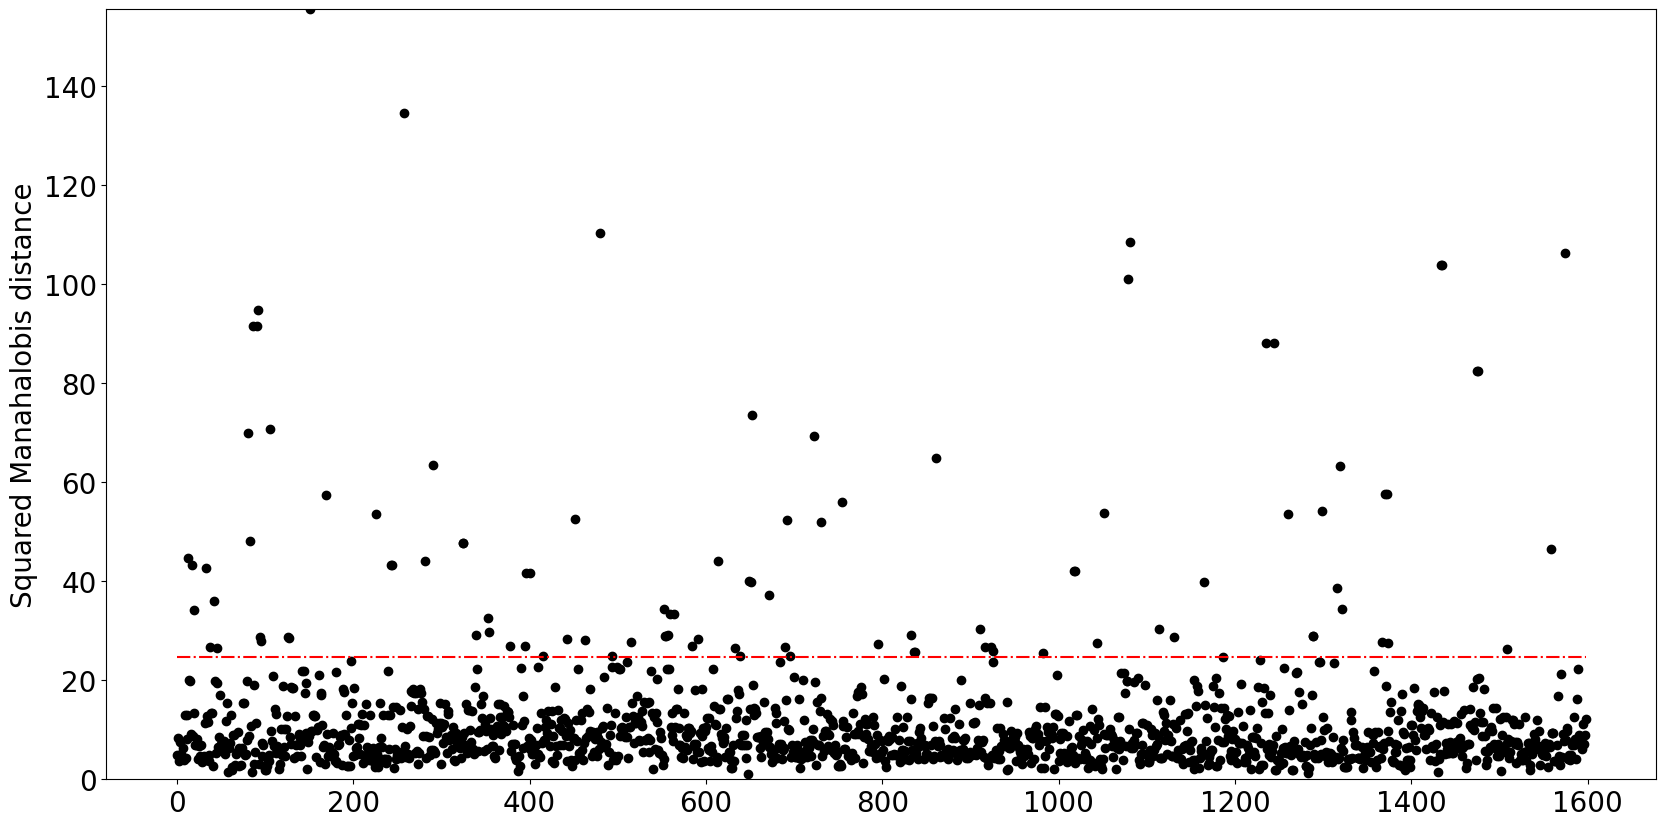

In [ ]:
from scipy import stats
### Computation of the Mahanalobis distance for red wine
Mana = Mahanalobis_dist(df_red)
N = len(df_red)
## Choosing the threshold to detect outliers
degree_chi2 = 11 ## degree of freedom is equal to 2 because the number of variables is 2.
crit_value = stats.chi2.ppf(0.99,degree_chi2) ##Threshold: out of 99% are outliers

## Graph sorted Manahalobis distance
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(N)
plt.plot(Mana**2,'ok') ### The squared Manahalobis distance behaves as a chi-square distribution
plt.plot([0,N-1],[crit_value,crit_value],'-.r')
plt.ylabel("Squared Manahalobis distance",fontsize=20)
plt.ylim([0,np.max(Mana**2)])
plt.tick_params(axis='both',labelsize=20)
plt.show()

In [ ]:
df_red['Mana'] = Mana**2
df_red['outlier'] = np.where(df_red.Mana > crit_value,1,0)
len(df_red[df_red['outlier'] == 1])/len(df_red)

0.06378986866791744

In [ ]:
df_red.loc[df_red['outlier']==1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Mana,outlier
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,44.766955,1
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,43.248906,1
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,34.245925,1
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,42.735827,1
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,26.689837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,82.498039,1
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,82.498039,1
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,26.279547,1
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,46.573968,1


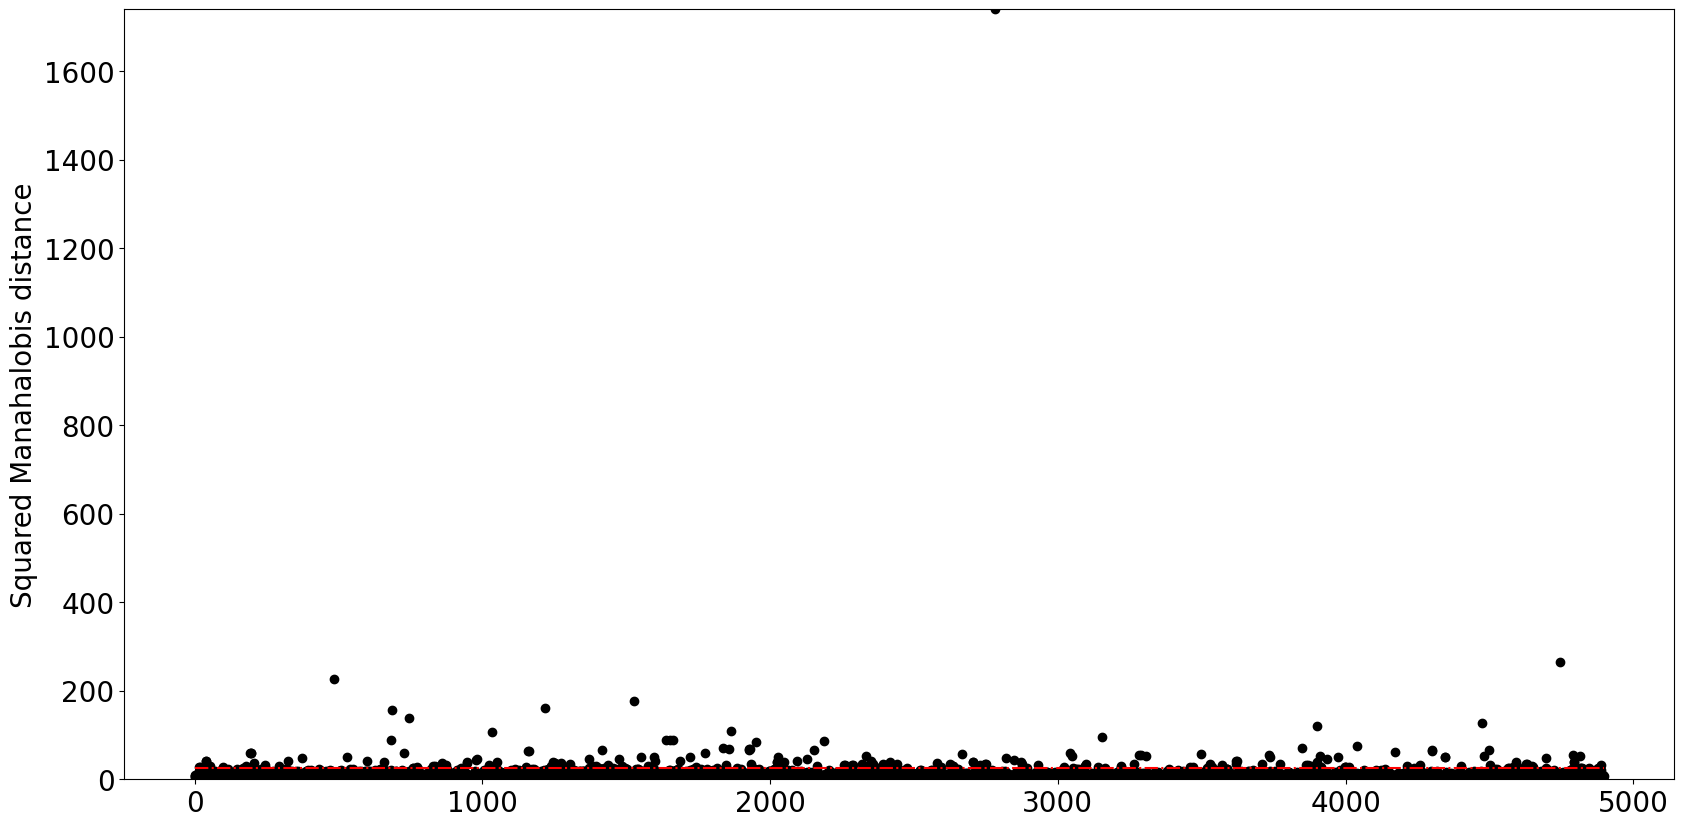

In [ ]:
### Computation of the Mahanalobis distance for white wine
Mana = Mahanalobis_dist(df_white)
N = len(df_white)
## Choosing the threshold to detect outliers
degree_chi2 = 11 ## degree of freedom is equal to 2 because the number of variables is 2.
crit_value = stats.chi2.ppf(0.99,degree_chi2) ##Threshold: out of 99% are outliers

## Graph sorted Manahalobis distance
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(N)
plt.plot(Mana**2,'ok') ### The squared Manahalobis distance behaves as a chi-square distribution
plt.plot([0,N-1],[crit_value,crit_value],'-.r')
plt.ylabel("Squared Manahalobis distance",fontsize=20)
plt.ylim([0,np.max(Mana**2)])
plt.tick_params(axis='both',labelsize=20)
plt.show()

In [ ]:
df_white['Mana'] = Mana**2
df_white['outlier'] = np.where(df_white.Mana > crit_value,1,0)
len(df_white[df_white['outlier'] == 1])/len(df_white)

0.044916292364230295

In [ ]:
df_white.loc[df_white['outlier']==1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Mana,outlier
1616,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.80,28.192163,1
1619,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.80,28.192163,1
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,25.053526,1
1639,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.99370,3.11,0.36,9.40,41.187806,1
1640,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.40,42.039911,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,6.0,0.32,0.30,7.3,0.174,46.0,159.0,0.99519,3.18,0.49,9.40,38.350478,1
6414,6.2,0.76,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.70,52.319584,1
6444,6.6,0.38,0.29,2.4,0.136,15.0,93.0,0.99336,3.18,0.60,9.50,25.188294,1
6476,5.9,0.54,0.00,0.8,0.032,12.0,82.0,0.99286,3.25,0.36,8.80,26.165374,1


- By looking into the characteristics of the outliers, we can see that some observations are treated as outliers because of extremely high value in residual sugar, acidity or SO2 etc. It doesn't mean they are errors, and actually they could exist in real life as special types of wine.
- But still we should delete them before building our model. Because we want our model to work robustly for most of the wine that belong to 'common types' without extreme features. After deleting these outliers, our model won't be biased by the extreme values.

In [ ]:
# Exclude outliers
df_red_clean = df_red.loc[df_red['outlier']==0]
df_white_clean = df_white.loc[df_white['outlier']==0]

## Abnormal observations of dependant variable based on explanatory variables

- Now that our dependant variables 'quality' is people's subjective sensory, there might be mistakes or niche preferences hidden in the process of  evaluating wine quality.
- We want a robust model, thus we have to eliminate this type of bias.
- However, we cannot simply exclude the observations with a high distance as what we did to the explanatory variables. For example, if a bottle of wine is 'perfect' in each metrics (here i.e. the explanatory variables), it is understandable for it to receive a high evaluation. And excluding those observations with extreme values of 'quality' will make our model for predicting extremely high or low values.
- Therefore, to detect outliers for the dependant variable, we should take both dependant variable and the independant variables into account conprehensively.

In [ ]:
# Extract observations of dependant variable which are not outliers in terms of explanatory variables
y_red = df[df.color == 'red'].loc[df_red['outlier']==0]['quality']
y_white = df[df.color == 'white'].loc[df_white['outlier']==0]['quality']

In [ ]:
y_red.describe()

count    1497.000000
mean        5.645959
std         0.800383
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
y_white.describe()

count    4678.000000
mean        5.899102
std         0.872253
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [ ]:
# Calculate distance for each observation from median
y_red_dist = (y_red - y_red.median()).abs()
y_white_dist = (y_white - y_white.median()).abs()

Scatter plot of Manahalobis distance on explanatory varibles vs distance on dependant variable:

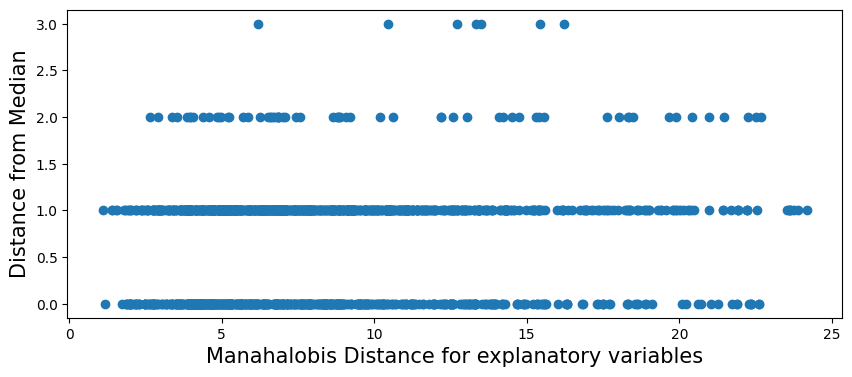

In [ ]:
#Red
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(df_red_clean['Mana'], y_red_dist)
plt.ylabel("Distance from Median",fontsize=15)
plt.xlabel("Manahalobis Distance for explanatory variables",fontsize=15)
plt.show()

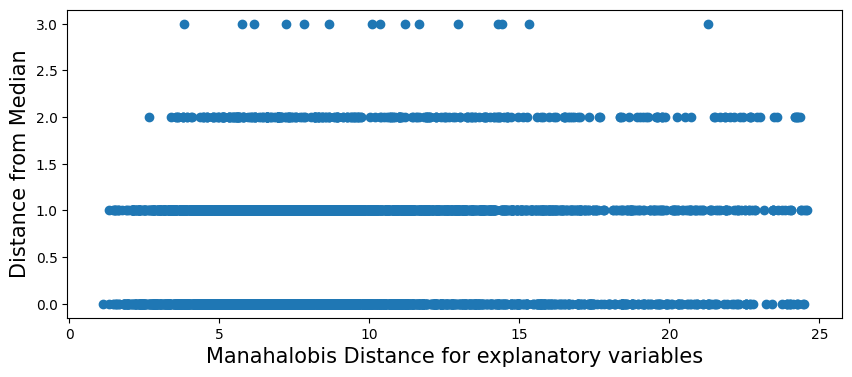

In [ ]:
#White
fig, ax = plt.subplots(figsize=(10, 4))
x = np.arange(N)
plt.scatter(df_white_clean['Mana'], y_white_dist)
plt.ylabel("Distance from Median",fontsize=15)
plt.xlabel("Manahalobis Distance for explanatory variables",fontsize=15)
plt.show()

- As we can see in the scatter plot, some observations have small Manahalobis distance for the explanatory variables but demonstrate a large distance from median on the dependant variable, which might show an evidence of outliers.
- However, the proportion of observations with extremely high or low 'quality' is very small, which could not make a big difference on the model. Thus it is not necessary for us to delete them.

# Feature Selection

- As it is mentioned in the introduction of this dataset, 'also, we are not sure if all input variables are relevant.', we considered it necessary to check the relevancy between the dependant variable and the explanatory variables.
- Excluding the irrelevant variables can make our model more explanable by reducing the complexity and also lower the risk of overfitting.

Calculate Pearson correlation coefficient and p-value

## Respectively for two colors of wine

In [ ]:
X_red = df_red_clean.drop(['Mana','outlier'],axis = 1)
X_white = df_white_clean.drop(['Mana','outlier'],axis = 1)

In [ ]:
from scipy.stats import pearsonr

# Red
result = {}
corr_coef = {}
p_value = {}
for column in X_red.columns:
    corr_coef[column], p_value[column] = pearsonr(y_red, X_red[column].values)
    if p_value[column] < 0.05:
        result[column] = 'select'
    else:
        result[column] = '/'

pd.DataFrame({
    'Column': X_red.columns,
    'Corr_coef': list(corr_coef.values()),
    'P-value': list(p_value.values()),
    'Result': list(result.values())
})


,Column,Corr_coef,P-value,Result
0,fixed_acidity,0.124669,1.308760e-06,select
1,volatile_acidity,-0.371781,2.823284e-50,select
2,citric_acid,0.232995,6.645237e-20,select
3,residual_sugar,0.015311,5.538844e-01,/
4,chlorides,-0.119215,3.741934e-06,select
5,free_sulfur_dioxide,-0.061524,1.727992e-02,select
6,total_sulfur_dioxide,-0.224821,1.317526e-18,select
7,density,-0.192676,5.512536e-14,select
8,pH,-0.053943,3.689864e-02,select
9,sulphates,0.373522,9.112858e-51,select


- Red Wine: Except residual_sugar, all the explanatory variables pass Pearson Correlation Test, thus selected to build the model.

In [ ]:
# White
result = {}
corr_coef = {}
p_value = {}
for column in X_white.columns:
    corr_coef[column], p_value[column] = pearsonr(y_white, X_white[column].values)
    if p_value[column] < 0.05:
        result[column] = 'select'
    else:
        result[column] = '/'

pd.DataFrame({
    'Column': X_white.columns,
    'Corr_coef': list(corr_coef.values()),
    'P-value': list(p_value.values()),
    'Result': list(result.values())
})


,Column,Corr_coef,P-value,Result
0,fixed_acidity,-0.097814,2.022530e-11,select
1,volatile_acidity,-0.161651,9.318070e-29,select
2,citric_acid,-0.005567,7.034774e-01,/
3,residual_sugar,-0.103817,1.095263e-12,select
4,chlorides,-0.269108,2.014963e-78,select
5,free_sulfur_dioxide,0.024075,9.967426e-02,/
6,total_sulfur_dioxide,-0.167614,8.028114e-31,select
7,density,-0.312084,3.342595e-106,select
8,pH,0.097645,2.190101e-11,select
9,sulphates,0.040011,6.201600e-03,select


- White Wine: Except citric_acid, free_sulfur_dioxide, all explanatory variables should be selected.

- More variables should be considered for red wine than white wine - this result is reasonable because red wine is with higher complexity than white wine thus more factors need to be taken into account.

## For all the wines

In [ ]:
# Concatenate rows of X_red and X_white
X = pd.concat([X_red, X_white], axis=0)

# Concatenate rows of y_red and y_white
y = pd.concat([y_red, y_white], axis=0)

In [ ]:
result = {}
corr_coef = {}
p_value = {}
for column in X.columns:
    corr_coef[column], p_value[column] = pearsonr(y, X[column].values)
    if p_value[column] < 0.05:
        result[column] = 'select'
    else:
        result[column] = '/'

pd.DataFrame({
    'Column': X.columns,
    'Corr_coef': list(corr_coef.values()),
    'P-value': list(p_value.values()),
    'Result': list(result.values())
})

,Column,Corr_coef,P-value,Result
0,fixed_acidity,-0.074133,5.466295e-09,select
1,volatile_acidity,-0.247381,9.176143e-87,select
2,citric_acid,0.096155,3.675992e-14,select
3,residual_sugar,-0.037663,3.076187e-03,select
4,chlorides,-0.231833,3.864270e-76,select
5,free_sulfur_dioxide,0.072213,1.340461e-08,select
6,total_sulfur_dioxide,-0.032526,1.058528e-02,select
7,density,-0.314765,4.484268e-142,select
8,pH,0.016068,2.067921e-01,/
9,sulphates,0.044919,4.141762e-04,select


- If we take all the wines as a whole regardless of the colors, all the explanatory variables pass Pearson Correlation Test except pH.

#  Neural Network Architecture

## Train a single model for both white and red wine

In [ ]:
# For all wines we select all columns except of Ph
column_to_exclude = 'pH'

X = X.loc[:, X.columns != column_to_exclude]

# split data into train and test subsets
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Before modelling part it is always a good idea to standartize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# We will solve multi classification problem. We have 10 classes --> convert dependent variable into 10 shape
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

- We start our modelling with 1 hidden layer

In [ ]:
input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=10, activation="softmax")


model1 = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    output_layer,
])

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod1 = model1.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
25/25 - 1s - loss: 2.1201 - accuracy: 0.2419 - val_loss: 1.7397 - val_accuracy: 0.4453 - 1s/epoch - 54ms/step
Epoch 2/10
25/25 - 0s - loss: 1.5233 - accuracy: 0.4877 - val_loss: 1.3804 - val_accuracy: 0.5012 - 102ms/epoch - 4ms/step
Epoch 3/10
25/25 - 0s - loss: 1.2741 - accuracy: 0.5152 - val_loss: 1.2527 - val_accuracy: 0.5182 - 94ms/epoch - 4ms/step
Epoch 4/10
25/25 - 0s - loss: 1.1778 - accuracy: 0.5340 - val_loss: 1.1953 - val_accuracy: 0.5182 - 96ms/epoch - 4ms/step
Epoch 5/10
25/25 - 0s - loss: 1.1304 - accuracy: 0.5464 - val_loss: 1.1619 - val_accuracy: 0.5287 - 90ms/epoch - 4ms/step
Epoch 6/10
25/25 - 0s - loss: 1.1024 - accuracy: 0.5468 - val_loss: 1.1417 - val_accuracy: 0.5320 - 82ms/epoch - 3ms/step
Epoch 7/10
25/25 - 0s - loss: 1.0846 - accuracy: 0.5447 - val_loss: 1.1280 - val_accuracy: 0.5409 - 96ms/epoch - 4ms/step
Epoch 8/10
25/25 - 0s - loss: 1.0716 - accuracy: 0.5514 - val_loss: 1.1194 - val_accuracy: 0.5474 - 81ms/epoch - 3ms/step
Epoch 9/10
25/25 - 0s - 

- Model 2 includes 2 hidden layers

In [ ]:
input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=10, activation="softmax")


model2 = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    output_layer,
])

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod2 = model2.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
25/25 - 1s - loss: 1.7291 - accuracy: 0.4352 - val_loss: 1.3542 - val_accuracy: 0.4972 - 949ms/epoch - 38ms/step
Epoch 2/10
25/25 - 0s - loss: 1.2017 - accuracy: 0.5269 - val_loss: 1.2000 - val_accuracy: 0.5206 - 98ms/epoch - 4ms/step
Epoch 3/10
25/25 - 0s - loss: 1.1081 - accuracy: 0.5460 - val_loss: 1.1479 - val_accuracy: 0.5352 - 117ms/epoch - 5ms/step
Epoch 4/10
25/25 - 0s - loss: 1.0778 - accuracy: 0.5510 - val_loss: 1.1288 - val_accuracy: 0.5506 - 104ms/epoch - 4ms/step
Epoch 5/10
25/25 - 0s - loss: 1.0591 - accuracy: 0.5593 - val_loss: 1.1168 - val_accuracy: 0.5514 - 102ms/epoch - 4ms/step
Epoch 6/10
25/25 - 0s - loss: 1.0462 - accuracy: 0.5634 - val_loss: 1.1051 - val_accuracy: 0.5522 - 104ms/epoch - 4ms/step
Epoch 7/10
25/25 - 0s - loss: 1.0338 - accuracy: 0.5656 - val_loss: 1.1059 - val_accuracy: 0.5603 - 94ms/epoch - 4ms/step
Epoch 8/10
25/25 - 0s - loss: 1.0278 - accuracy: 0.5706 - val_loss: 1.0932 - val_accuracy: 0.5522 - 102ms/epoch - 4ms/step
Epoch 9/10
25/25 

- Model 3 includes 3 hidden layers

In [ ]:
input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=10, activation="softmax")


model3 = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    output_layer,
])

model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod3 = model3.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
25/25 - 2s - loss: 1.8462 - accuracy: 0.3957 - val_loss: 1.3970 - val_accuracy: 0.4818 - 2s/epoch - 69ms/step
Epoch 2/10
25/25 - 0s - loss: 1.2208 - accuracy: 0.5221 - val_loss: 1.1912 - val_accuracy: 0.5134 - 192ms/epoch - 8ms/step
Epoch 3/10
25/25 - 0s - loss: 1.1053 - accuracy: 0.5516 - val_loss: 1.1267 - val_accuracy: 0.5466 - 205ms/epoch - 8ms/step
Epoch 4/10
25/25 - 0s - loss: 1.0689 - accuracy: 0.5504 - val_loss: 1.1109 - val_accuracy: 0.5409 - 188ms/epoch - 8ms/step
Epoch 5/10
25/25 - 0s - loss: 1.0478 - accuracy: 0.5660 - val_loss: 1.1010 - val_accuracy: 0.5457 - 148ms/epoch - 6ms/step
Epoch 6/10
25/25 - 0s - loss: 1.0392 - accuracy: 0.5599 - val_loss: 1.0931 - val_accuracy: 0.5490 - 116ms/epoch - 5ms/step
Epoch 7/10
25/25 - 0s - loss: 1.0265 - accuracy: 0.5680 - val_loss: 1.0800 - val_accuracy: 0.5579 - 113ms/epoch - 5ms/step
Epoch 8/10
25/25 - 0s - loss: 1.0148 - accuracy: 0.5692 - val_loss: 1.0744 - val_accuracy: 0.5522 - 116ms/epoch - 5ms/step
Epoch 9/10
25/25 -

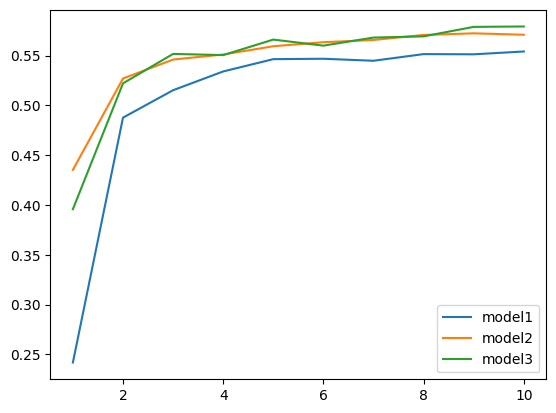

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), mod1.history["accuracy"], label="model1")
plt.plot(np.arange(1, 11), mod2.history["accuracy"], label="model2")
plt.plot(np.arange(1, 11), mod3.history["accuracy"], label="model3")
plt.legend();

- According to the modelling results there are no significant differences in models -- pick model 1 with 1 hidden layer to not to increase the complexity the modelling

- OPTIMIZER CHANGE - Now we change the optimezer from adam to sgd and test again 3 layers

- Model with 1 hidden layer

In [ ]:
input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=10, activation="softmax")


model1_1 = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    output_layer,
])

model1_1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
mod1_1 = model1_1.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
25/25 - 1s - loss: 2.2725 - accuracy: 0.1723 - val_loss: 2.1162 - val_accuracy: 0.2300 - 790ms/epoch - 32ms/step
Epoch 2/10
25/25 - 0s - loss: 1.9916 - accuracy: 0.3395 - val_loss: 1.8826 - val_accuracy: 0.3927 - 106ms/epoch - 4ms/step
Epoch 3/10
25/25 - 0s - loss: 1.7831 - accuracy: 0.4344 - val_loss: 1.7122 - val_accuracy: 0.4502 - 92ms/epoch - 4ms/step
Epoch 4/10
25/25 - 0s - loss: 1.6323 - accuracy: 0.4759 - val_loss: 1.5916 - val_accuracy: 0.4704 - 88ms/epoch - 4ms/step
Epoch 5/10
25/25 - 0s - loss: 1.5252 - accuracy: 0.4850 - val_loss: 1.5064 - val_accuracy: 0.4907 - 91ms/epoch - 4ms/step
Epoch 6/10
25/25 - 0s - loss: 1.4489 - accuracy: 0.4931 - val_loss: 1.4458 - val_accuracy: 0.4964 - 83ms/epoch - 3ms/step
Epoch 7/10
25/25 - 0s - loss: 1.3934 - accuracy: 0.4962 - val_loss: 1.4014 - val_accuracy: 0.4996 - 93ms/epoch - 4ms/step
Epoch 8/10
25/25 - 0s - loss: 1.3520 - accuracy: 0.5010 - val_loss: 1.3679 - val_accuracy: 0.4996 - 88ms/epoch - 4ms/step
Epoch 9/10
25/25 - 0s

- Model with 2 hidden layers

In [ ]:
input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=10, activation="softmax")


model2_1 = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    output_layer,
])

model2_1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
mod2_1 = model2_1.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
25/25 - 1s - loss: 2.1827 - accuracy: 0.2008 - val_loss: 2.0460 - val_accuracy: 0.2899 - 732ms/epoch - 29ms/step
Epoch 2/10
25/25 - 0s - loss: 1.9217 - accuracy: 0.3955 - val_loss: 1.8130 - val_accuracy: 0.4227 - 105ms/epoch - 4ms/step
Epoch 3/10
25/25 - 0s - loss: 1.7046 - accuracy: 0.4587 - val_loss: 1.6258 - val_accuracy: 0.4575 - 105ms/epoch - 4ms/step
Epoch 4/10
25/25 - 0s - loss: 1.5371 - accuracy: 0.4785 - val_loss: 1.4917 - val_accuracy: 0.4599 - 106ms/epoch - 4ms/step
Epoch 5/10
25/25 - 0s - loss: 1.4210 - accuracy: 0.4931 - val_loss: 1.4041 - val_accuracy: 0.4761 - 99ms/epoch - 4ms/step
Epoch 6/10
25/25 - 0s - loss: 1.3454 - accuracy: 0.4980 - val_loss: 1.3482 - val_accuracy: 0.4915 - 113ms/epoch - 5ms/step
Epoch 7/10
25/25 - 0s - loss: 1.2957 - accuracy: 0.5045 - val_loss: 1.3113 - val_accuracy: 0.5012 - 107ms/epoch - 4ms/step
Epoch 8/10
25/25 - 0s - loss: 1.2616 - accuracy: 0.5077 - val_loss: 1.2855 - val_accuracy: 0.5020 - 111ms/epoch - 4ms/step
Epoch 9/10
25/25

- Model with 3 hidden layers

In [ ]:
input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=10, activation="softmax")


model3_1 = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    output_layer,
])

model3_1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
mod3_1 = model3_1.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
25/25 - 1s - loss: 2.3493 - accuracy: 0.1020 - val_loss: 2.1974 - val_accuracy: 0.1862 - 813ms/epoch - 33ms/step
Epoch 2/10
25/25 - 0s - loss: 2.0795 - accuracy: 0.2852 - val_loss: 1.9687 - val_accuracy: 0.3636 - 106ms/epoch - 4ms/step
Epoch 3/10
25/25 - 0s - loss: 1.8591 - accuracy: 0.4162 - val_loss: 1.7646 - val_accuracy: 0.4316 - 103ms/epoch - 4ms/step
Epoch 4/10
25/25 - 0s - loss: 1.6628 - accuracy: 0.4387 - val_loss: 1.5931 - val_accuracy: 0.4364 - 108ms/epoch - 4ms/step
Epoch 5/10
25/25 - 0s - loss: 1.5076 - accuracy: 0.4383 - val_loss: 1.4730 - val_accuracy: 0.4364 - 108ms/epoch - 4ms/step
Epoch 6/10
25/25 - 0s - loss: 1.4029 - accuracy: 0.4405 - val_loss: 1.3994 - val_accuracy: 0.4397 - 109ms/epoch - 4ms/step
Epoch 7/10
25/25 - 0s - loss: 1.3390 - accuracy: 0.4498 - val_loss: 1.3575 - val_accuracy: 0.4405 - 111ms/epoch - 4ms/step
Epoch 8/10
25/25 - 0s - loss: 1.3014 - accuracy: 0.4644 - val_loss: 1.3331 - val_accuracy: 0.4656 - 109ms/epoch - 4ms/step
Epoch 9/10
25/2

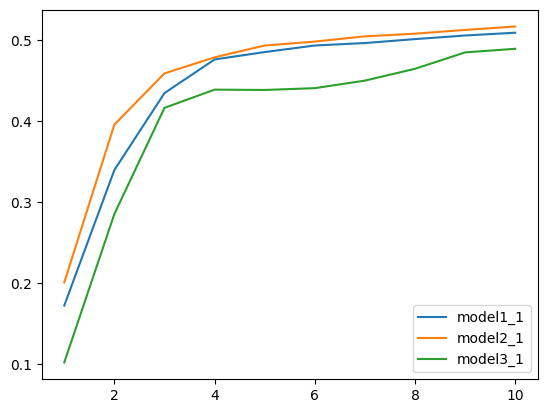

In [ ]:
plt.plot(np.arange(1, 11), mod1_1.history["accuracy"], label="model1_1")
plt.plot(np.arange(1, 11), mod2_1.history["accuracy"], label="model2_1")
plt.plot(np.arange(1, 11), mod3_1.history["accuracy"], label="model3_1")
plt.legend();

- We pick the model with (sgd optimizer; 1 hidden layer) and compare it with the model with (adam optimizer; 1 hidden layer)

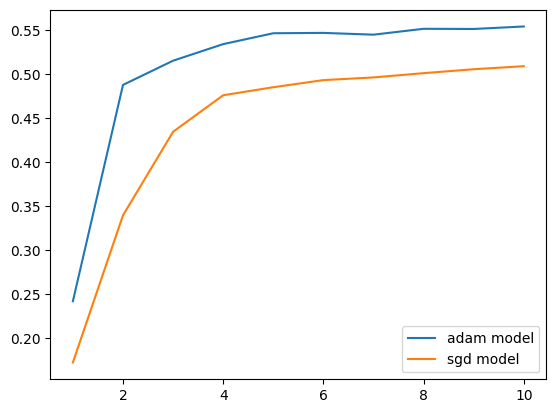

In [ ]:
plt.plot(np.arange(1, 11), mod1.history["accuracy"], label="adam model")
plt.plot(np.arange(1, 11), mod1_1.history["accuracy"], label="sgd model")
plt.legend();

- For this part we select neural network with (sgd optimizer; 1 hidden layer)


## Train two different models, one for white wine and another one for red wine

### White wine




In [ ]:
# For white wines we select all columns except of 2
column_to_exclude = ['citric_acid', 'free_sulfur_dioxide']

X_whites = X_white.copy()
y_whites = y_white.copy()

X_whites = X_white.drop(columns=column_to_exclude)

# split data into train and test subsets
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_whites, y_whites, test_size=test_size, random_state=42)

# Before modelling part it is always a good idea to standartize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will solve multi classification problem. We have 10 classes --> convert dependent variable into 10 shape
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# We have done all the steps as we did for both wines - different number of layers and optimizers and the results are the same - select (adam, 1 layer)
input_layer = InputLayer(input_shape=(9,))
output_layer = Dense(units=10, activation="softmax")


model_white = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    output_layer,
])

model_white.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod_white = model_white.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
19/19 - 1s - loss: 2.1131 - accuracy: 0.2352 - val_loss: 1.8639 - val_accuracy: 0.3515 - 820ms/epoch - 43ms/step
Epoch 2/10
19/19 - 0s - loss: 1.6579 - accuracy: 0.4190 - val_loss: 1.5390 - val_accuracy: 0.4156 - 69ms/epoch - 4ms/step
Epoch 3/10
19/19 - 0s - loss: 1.4069 - accuracy: 0.4725 - val_loss: 1.3712 - val_accuracy: 0.4744 - 68ms/epoch - 4ms/step
Epoch 4/10
19/19 - 0s - loss: 1.2845 - accuracy: 0.5134 - val_loss: 1.2920 - val_accuracy: 0.5075 - 82ms/epoch - 4ms/step
Epoch 5/10
19/19 - 0s - loss: 1.2215 - accuracy: 0.5326 - val_loss: 1.2522 - val_accuracy: 0.5064 - 70ms/epoch - 4ms/step
Epoch 6/10
19/19 - 0s - loss: 1.1814 - accuracy: 0.5417 - val_loss: 1.2220 - val_accuracy: 0.5182 - 105ms/epoch - 6ms/step
Epoch 7/10
19/19 - 0s - loss: 1.1523 - accuracy: 0.5454 - val_loss: 1.2046 - val_accuracy: 0.5085 - 81ms/epoch - 4ms/step
Epoch 8/10
19/19 - 0s - loss: 1.1295 - accuracy: 0.5537 - val_loss: 1.1884 - val_accuracy: 0.5203 - 73ms/epoch - 4ms/step
Epoch 9/10
19/19 - 0s

### Red whine

In [ ]:
# For red wines we select all columns except of 1
column_to_exclude = 'residual_sugar'

X_reds = X_red.copy()
y_reds = y_red.copy()

X_reds = X_reds.drop(columns=column_to_exclude)

# split data into train and test subsets
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_reds, y_reds, test_size=test_size, random_state=42)

# Before modelling part it is always a good idea to standartize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will solve multi classification problem. We have 10 classes --> convert dependent variable into 10 shape
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# We have done all the steps as we did for both wines - different number of layers and optimizers and the results are - select (adam, 3 layers)
input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=9, activation="softmax")


model_red = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    output_layer,
])

model_red.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod_red = model_red.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
6/6 - 2s - loss: 2.0764 - accuracy: 0.2932 - val_loss: 1.9589 - val_accuracy: 0.4433 - 2s/epoch - 330ms/step
Epoch 2/10
6/6 - 0s - loss: 1.8883 - accuracy: 0.4277 - val_loss: 1.7552 - val_accuracy: 0.4733 - 90ms/epoch - 15ms/step
Epoch 3/10
6/6 - 0s - loss: 1.6936 - accuracy: 0.4444 - val_loss: 1.5467 - val_accuracy: 0.5067 - 121ms/epoch - 20ms/step
Epoch 4/10
6/6 - 0s - loss: 1.5049 - accuracy: 0.4820 - val_loss: 1.3493 - val_accuracy: 0.5833 - 98ms/epoch - 16ms/step
Epoch 5/10
6/6 - 0s - loss: 1.3406 - accuracy: 0.5464 - val_loss: 1.2103 - val_accuracy: 0.6000 - 125ms/epoch - 21ms/step
Epoch 6/10
6/6 - 0s - loss: 1.2281 - accuracy: 0.5848 - val_loss: 1.1306 - val_accuracy: 0.6133 - 83ms/epoch - 14ms/step
Epoch 7/10
6/6 - 0s - loss: 1.1645 - accuracy: 0.5848 - val_loss: 1.0776 - val_accuracy: 0.6233 - 117ms/epoch - 20ms/step
Epoch 8/10
6/6 - 0s - loss: 1.1145 - accuracy: 0.5915 - val_loss: 1.0469 - val_accuracy: 0.6267 - 126ms/epoch - 21ms/step
Epoch 9/10
6/6 - 0s - loss: 1

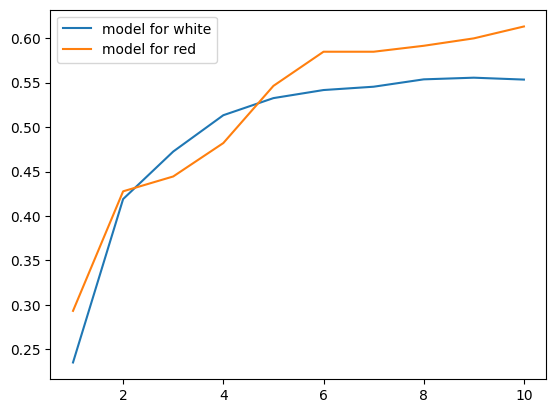

In [ ]:
plt.plot(np.arange(1, 11), mod_white.history["accuracy"], label="model for white")
plt.plot(np.arange(1, 11), mod_red.history["accuracy"], label="model for red")
plt.legend();

- The general result from this part - it makes sense to seperate our wines and build models for each category

## Train a model on white wine (respectively red wine) and fine-tune it on red wine (resp. white wine)

- train on white --> fine-tune on red

In [ ]:
# Train on white
# For white wines we select all columns except of 2
column_to_exclude = ['citric_acid', 'free_sulfur_dioxide']

X_whites = X_white.copy()
y_whites = y_white.copy()

X_whites = X_white.drop(columns=column_to_exclude)

# split data into train and test subsets
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_whites, y_whites, test_size=test_size, random_state=42)

# Before modelling part it is always a good idea to standartize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will solve multi classification problem. We have 10 classes --> convert dependent variable into 10 shape
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

input_layer = InputLayer(input_shape=(9,))
output_layer = Dense(units=10, activation="softmax")


model_white = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    output_layer,
])

model_white.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod_white = model_white.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
19/19 - 1s - loss: 2.0134 - accuracy: 0.3838 - val_loss: 1.7732 - val_accuracy: 0.4551 - 796ms/epoch - 42ms/step
Epoch 2/10
19/19 - 0s - loss: 1.5939 - accuracy: 0.4690 - val_loss: 1.4874 - val_accuracy: 0.4690 - 83ms/epoch - 4ms/step
Epoch 3/10
19/19 - 0s - loss: 1.3734 - accuracy: 0.4984 - val_loss: 1.3453 - val_accuracy: 0.4818 - 71ms/epoch - 4ms/step
Epoch 4/10
19/19 - 0s - loss: 1.2629 - accuracy: 0.5257 - val_loss: 1.2753 - val_accuracy: 0.5011 - 88ms/epoch - 5ms/step
Epoch 5/10
19/19 - 0s - loss: 1.2001 - accuracy: 0.5417 - val_loss: 1.2348 - val_accuracy: 0.5128 - 72ms/epoch - 4ms/step
Epoch 6/10
19/19 - 0s - loss: 1.1607 - accuracy: 0.5526 - val_loss: 1.2103 - val_accuracy: 0.5310 - 91ms/epoch - 5ms/step
Epoch 7/10
19/19 - 0s - loss: 1.1326 - accuracy: 0.5540 - val_loss: 1.1933 - val_accuracy: 0.5310 - 88ms/epoch - 5ms/step
Epoch 8/10
19/19 - 0s - loss: 1.1123 - accuracy: 0.5583 - val_loss: 1.1821 - val_accuracy: 0.5299 - 95ms/epoch - 5ms/step
Epoch 9/10
19/19 - 0s 

In [ ]:
# Fine-tune on red
column_to_exclude = ['citric_acid', 'free_sulfur_dioxide']

X_reds = X_red.copy()
y_reds = y_red.copy()

X_reds = X_reds.drop(columns=column_to_exclude)

# split data into train and test subsets
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_reds, y_reds, test_size=test_size, random_state=42)

# Before modelling part it is always a good idea to standartize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will solve multi classification problem. We have 10 classes --> convert dependent variable into 10 shape
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


input_layer = InputLayer(input_shape=(9,))
output_layer = Dense(units=9, activation="softmax")


model_white = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    output_layer,
])

model_white.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod_white = model_white.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
6/6 - 1s - loss: 2.1969 - accuracy: 0.1504 - val_loss: 2.0960 - val_accuracy: 0.1767 - 1s/epoch - 213ms/step
Epoch 2/10
6/6 - 0s - loss: 1.9880 - accuracy: 0.2924 - val_loss: 1.9020 - val_accuracy: 0.3267 - 81ms/epoch - 14ms/step
Epoch 3/10
6/6 - 0s - loss: 1.8095 - accuracy: 0.4294 - val_loss: 1.7324 - val_accuracy: 0.4900 - 77ms/epoch - 13ms/step
Epoch 4/10
6/6 - 0s - loss: 1.6530 - accuracy: 0.5113 - val_loss: 1.5882 - val_accuracy: 0.5533 - 117ms/epoch - 20ms/step
Epoch 5/10
6/6 - 0s - loss: 1.5220 - accuracy: 0.5530 - val_loss: 1.4669 - val_accuracy: 0.5700 - 146ms/epoch - 24ms/step
Epoch 6/10
6/6 - 0s - loss: 1.4157 - accuracy: 0.5798 - val_loss: 1.3662 - val_accuracy: 0.5767 - 102ms/epoch - 17ms/step
Epoch 7/10
6/6 - 0s - loss: 1.3267 - accuracy: 0.5881 - val_loss: 1.2840 - val_accuracy: 0.5800 - 148ms/epoch - 25ms/step
Epoch 8/10
6/6 - 0s - loss: 1.2550 - accuracy: 0.5906 - val_loss: 1.2185 - val_accuracy: 0.5867 - 132ms/epoch - 22ms/step
Epoch 9/10
6/6 - 0s - loss: 

- train on red --> fine-tune on white

In [ ]:
# Train on red
# For red wines we select all columns except of 1
column_to_exclude = 'residual_sugar'

X_reds = X_red.copy()
y_reds = y_red.copy()

X_reds = X_reds.drop(columns=column_to_exclude)

# split data into train and test subsets
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_reds, y_reds, test_size=test_size, random_state=42)

# Before modelling part it is always a good idea to standartize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will solve multi classification problem. We have 10 classes --> convert dependent variable into 10 shape
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=9, activation="softmax")


model_red = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    output_layer,
])

model_red.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod_red = model_red.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
6/6 - 1s - loss: 1.9725 - accuracy: 0.4353 - val_loss: 1.8153 - val_accuracy: 0.4567 - 1s/epoch - 224ms/step
Epoch 2/10
6/6 - 0s - loss: 1.7337 - accuracy: 0.4946 - val_loss: 1.5694 - val_accuracy: 0.5467 - 50ms/epoch - 8ms/step
Epoch 3/10
6/6 - 0s - loss: 1.5035 - accuracy: 0.5480 - val_loss: 1.3509 - val_accuracy: 0.5833 - 79ms/epoch - 13ms/step
Epoch 4/10
6/6 - 0s - loss: 1.3209 - accuracy: 0.5597 - val_loss: 1.2071 - val_accuracy: 0.5867 - 49ms/epoch - 8ms/step
Epoch 5/10
6/6 - 0s - loss: 1.2144 - accuracy: 0.5614 - val_loss: 1.1263 - val_accuracy: 0.5833 - 53ms/epoch - 9ms/step
Epoch 6/10
6/6 - 0s - loss: 1.1551 - accuracy: 0.5748 - val_loss: 1.0741 - val_accuracy: 0.6100 - 53ms/epoch - 9ms/step
Epoch 7/10
6/6 - 0s - loss: 1.1073 - accuracy: 0.5815 - val_loss: 1.0364 - val_accuracy: 0.6233 - 54ms/epoch - 9ms/step
Epoch 8/10
6/6 - 0s - loss: 1.0639 - accuracy: 0.5906 - val_loss: 1.0128 - val_accuracy: 0.6167 - 68ms/epoch - 11ms/step
Epoch 9/10
6/6 - 0s - loss: 1.0315 - a

In [ ]:
# Fine tune on white
column_to_exclude = 'residual_sugar'

X_whites = X_white.copy()
y_whites = y_white.copy()

X_whites = X_white.drop(columns=column_to_exclude)

# split data into train and test subsets
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_whites, y_whites, test_size=test_size, random_state=42)

# Before modelling part it is always a good idea to standartize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will solve multi classification problem. We have 10 classes --> convert dependent variable into 10 shape
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


input_layer = InputLayer(input_shape=(10,))
output_layer = Dense(units=10, activation="softmax")


model_red = Sequential([
    input_layer,
    Dense(units=128, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    output_layer,
])

model_red.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mod_red = model_red.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
19/19 - 2s - loss: 1.9672 - accuracy: 0.3773 - val_loss: 1.5765 - val_accuracy: 0.4882 - 2s/epoch - 110ms/step
Epoch 2/10
19/19 - 0s - loss: 1.3637 - accuracy: 0.5016 - val_loss: 1.2659 - val_accuracy: 0.4968 - 149ms/epoch - 8ms/step
Epoch 3/10
19/19 - 0s - loss: 1.1837 - accuracy: 0.5420 - val_loss: 1.2129 - val_accuracy: 0.5267 - 142ms/epoch - 7ms/step
Epoch 4/10
19/19 - 0s - loss: 1.1244 - accuracy: 0.5564 - val_loss: 1.1739 - val_accuracy: 0.5374 - 160ms/epoch - 8ms/step
Epoch 5/10
19/19 - 0s - loss: 1.0866 - accuracy: 0.5633 - val_loss: 1.1570 - val_accuracy: 0.5427 - 143ms/epoch - 8ms/step
Epoch 6/10
19/19 - 0s - loss: 1.0630 - accuracy: 0.5706 - val_loss: 1.1554 - val_accuracy: 0.5353 - 146ms/epoch - 8ms/step
Epoch 7/10
19/19 - 0s - loss: 1.0437 - accuracy: 0.5748 - val_loss: 1.1439 - val_accuracy: 0.5385 - 151ms/epoch - 8ms/step
Epoch 8/10
19/19 - 0s - loss: 1.0317 - accuracy: 0.5687 - val_loss: 1.1277 - val_accuracy: 0.5449 - 157ms/epoch - 8ms/step
Epoch 9/10
19/19 

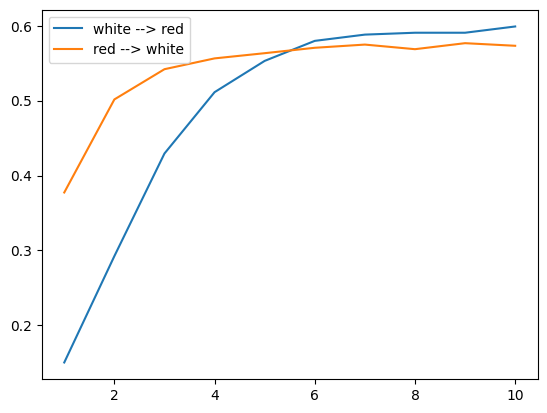

In [ ]:
plt.plot(np.arange(1, 11), mod_white.history["accuracy"], label="white --> red")
plt.plot(np.arange(1, 11), mod_red.history["accuracy"], label="red --> white")
plt.legend();

- After all modeling parts the final conclusion we can make by analyzing metrics is that the most efficient strategy is to build 2 separate models - for white and for red wines respectively.